In [1]:
!pip install keras==2.4.3
!pip install tensorflow==2.5.0
!pip install matplotlib

  Using cached tensorflow-2.5.0-cp39-cp39-macosx_10_11_x86_64.whl (195.7 MB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.5.0-py3-none-any.whl (6.0 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-macosx_10_9_x86_64.whl (3.5 MB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)


#### 고양이 / 개 분류 학습을 통해 Data Augmentation 과 Batch Normalization의 효과에 대해서 이해

In [8]:
import os, shutil

base_dir = "/Users/jh/Desktop/dogcat/Dog_v_Cat_small"
checkpoint_dir = "/Users/jh/Desktop/dogcat/checkpoints"

# Directory for Training, Validation, Test set
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

- Batch Normalization 이 없는 CNN 모델

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

inputs = layers.Input(shape=(150, 150, 3))

# representation layers
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# fully connected layers
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) # add a dropout layer
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)  # 3개의 class 라면 2가 아니라 3이 되어야 한다.

model = keras.Model(inputs, x)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)      

- Cross Entropy Loss 사용 / learning rate : 0.0001

In [10]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

- Without Data Augmentation

In [11]:
# data preprocessing
from keras.preprocessing.image import ImageDataGenerator

# data augmentation for training dataset
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                    # target directory
    target_size=(150, 150),       # input size to rescale
    batch_size=20,                # (samples * epoch) / steps
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,               # target directory
    target_size=(150, 150),       # input size to rescale
    batch_size=20,                # change batch_size : 20
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 88s 883ms/step - loss: 0.6927 - acc: 0.5355 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 67s 665ms/step - loss: 0.6733 - acc: 0.5905 - val_loss: 0.6995 - val_acc: 0.5140
Epoch 3/30
100/100 [==============================] - 65s 653ms/step - loss: 0.6450 - acc: 0.6365 - val_loss: 0.6404 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 66s 656ms/step - loss: 0.6103 - acc: 0.6685 - val_loss: 0.6087 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 76s 761ms/step - loss: 0.5759 - acc: 0.6920 - val_loss: 0.6127 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 72s 722ms/step - loss: 0.5410 - acc: 0.7190 - val_loss: 0.5930 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 82s 820ms/step - loss: 0.5253 - acc: 0.7380 - val_loss: 0.65

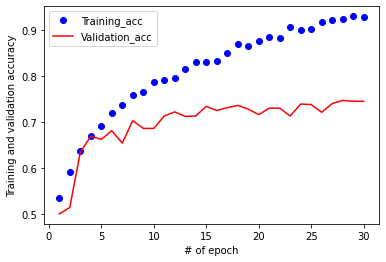

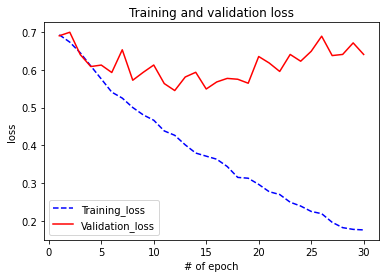

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Drow Graph
plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'r', label='Validation_acc')
plt.xlabel('# of epoch')
plt.ylabel('Training and validation accuracy')
plt.legend() # display label name

plt.figure()

plt.plot(epochs, loss, 'b--', label='Training_loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.xlabel('# of epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend() # display label name

plt.show()

- Data Augmentation 추가하여 학습

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [19]:
# data augmentation for training dataset
# train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                    # target directory
    target_size=(150, 150),       # input size to rescale
    batch_size=20,                # (samples * epoch) / steps
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,               # target directory
    target_size=(150, 150),       # input size to rescale
    batch_size=20,                # change batch_size : 20
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 78s 780ms/step - loss: 0.6529 - acc: 0.6825 - val_loss: 0.5933 - val_acc: 0.6950
Epoch 2/30
100/100 [==============================] - 75s 753ms/step - loss: 0.5910 - acc: 0.6870 - val_loss: 0.5649 - val_acc: 0.7000
Epoch 3/30
100/100 [==============================] - 86s 860ms/step - loss: 0.5965 - acc: 0.6880 - val_loss: 0.5153 - val_acc: 0.7480
Epoch 4/30
100/100 [==============================] - 77s 768ms/step - loss: 0.5659 - acc: 0.7075 - val_loss: 0.5589 - val_acc: 0.7180
Epoch 5/30
100/100 [==============================] - 71s 713ms/step - loss: 0.5626 - acc: 0.7170 - val_loss: 0.4828 - val_acc: 0.7710
Epoch 6/30
100/100 [==============================] - 82s 820ms/step - loss: 0.5478 - acc: 0.7185 - val_loss: 0.5131 - val_acc: 0.7410
Epoch 7/30
100/100 [==============================] - 83s 834ms/step - loss: 0.5396 - acc: 0.7295 - val_loss: 0.4969 - val_acc: 0.7530
Epoch 8/30
100/100 [==============================] - 7

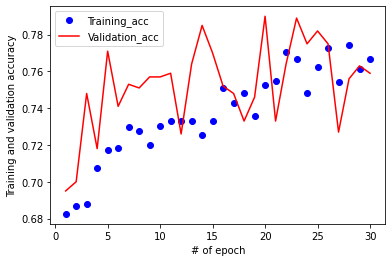

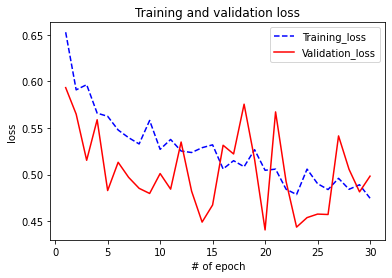

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Drow Graph
plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'r', label='Validation_acc')
plt.xlabel('# of epoch')
plt.ylabel('Training and validation accuracy')
plt.legend() # display label name

plt.figure()

plt.plot(epochs, loss, 'b--', label='Training_loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.xlabel('# of epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend() # display label name

plt.show()

- Batch Normalization 추가하여 학습

In [22]:
inputs = layers.Input(shape=(150, 150, 3))

# representation layers
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)

# fully connected layers
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x) # add a dropout layer
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)

model = keras.Model(inputs, x)
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)       

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                    # target directory
    target_size=(150, 150),       # input size to rescale
    batch_size=20,                # (samples * epoch) / steps
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,               # target directory
    target_size=(150, 150),       # input size to rescale
    batch_size=20,                # change batch_size : 20
    class_mode='categorical'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 97s 970ms/step - loss: 1.3670 - acc: 0.5505 - val_loss: 0.8335 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 93s 935ms/step - loss: 1.0282 - acc: 0.6050 - val_loss: 3.5024 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 92s 917ms/step - loss: 0.8967 - acc: 0.6275 - val_loss: 2.5002 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.8211 - acc: 0.6220 - val_loss: 1.1743 - val_acc: 0.5600
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.7182 - acc: 0.6450 - val_loss: 0.6032 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 131s 1s/step - loss: 0.6884 - acc: 0.6605 - val_loss: 0.5622 - val_acc: 0.7030
Epoch 7/30
100/100 [==============================] - 116s 1s/step - loss: 0.6558 - acc: 0.6710 - val_loss: 0.5610 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 110s 1s/s

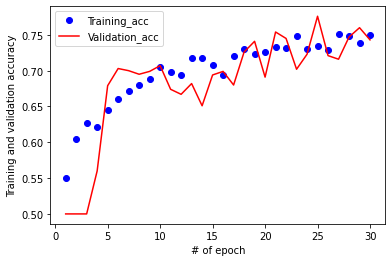

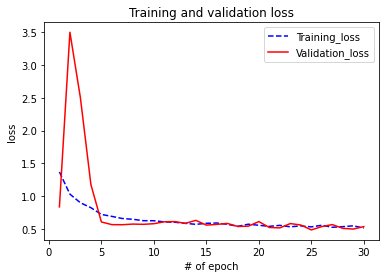

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Drow Graph
plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'r', label='Validation_acc')
plt.xlabel('# of epoch')
plt.ylabel('Training and validation accuracy')
plt.legend() # display label name

plt.figure()

plt.plot(epochs, loss, 'b--', label='Training_loss')
plt.plot(epochs, val_loss, 'r', label='Validation_loss')
plt.xlabel('# of epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend() # display label name

plt.show()